In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Minería de Datos I
## Examen final de curso
## Marianela Pi
Descripción: El conjunto de datos que se le proporciona para este ejercicio, contiene datos de
transacciones realizadas con Tarjetas de Crédito (TC) de clientes que pagan a comerciantes. En
esencia, una transacción con TC consiste en cualquier monto pagado a un comerciante por un
cliente en un momento determinado. El dataset contiene un total de 23 variables y más de
200.000 transacciones. Del conjunto de variables se describen a continuación las más
relevantes para el análisis:
- ID de la transacción: un identificador único para la transacción.
- Fecha y hora: fecha y hora en la que se produce la transacción.
- ID del cliente: el identificador del cliente. Cada cliente tiene un identificador único.
- ID del terminal: El identificador del comerciante (o más precisamente del terminal).
Cada terminal tiene un identificador único
- Monto de la transacción: el monto en dólares de la transacción.
- Etiqueta de fraude: una variable binaria, con el valor 0 para una transacción legítima o
el valor 1 para una transacción fraudulenta.
Estas características, en el dataset, se denominan: TRANSACTION_ID, TX_DATETIME,
CUSTOMER_ID, TERMINAL_ID, TX_AMOUNTy TX_FRAUD. El resto de las variables son menos
importantes, pero deben formar parte de la etapa de pre-procesamiento de datos, modelado y
evaluación.
Se le pide que, con el dataset en cuestión, Ud. pueda construir un modelo de detección de
fraude. Para ello deberá implementar las siguientes etapas:
1. Ingeniería de atributos (5 puntos)
2. Entrenamiento del modelo (2 puntos)
3. Validación del modelo (3 puntos)

### Ingeniería de Atributos:

In [27]:
# Cargar el dataset
df = pd.read_csv('transactions.csv')
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,1102483,2018-07-25 00:00:29,1111,2328,40.77,9936029,115,0,0,...,24.0,29.191250,105.0,30.141810,1.0,0.0,10.0,0.0,32.0,0.0
1,1,1102484,2018-07-25 00:01:08,676,6846,9.62,9936068,115,0,0,...,15.0,19.151333,61.0,18.253607,2.0,0.0,5.0,0.0,27.0,0.0
2,2,1102485,2018-07-25 00:01:35,402,4771,81.55,9936095,115,0,0,...,11.0,183.875455,50.0,112.001800,0.0,0.0,12.0,0.0,37.0,0.0
3,3,1102486,2018-07-25 00:01:43,4218,863,23.10,9936103,115,0,0,...,24.0,21.201667,93.0,19.987849,2.0,0.0,6.0,0.0,22.0,0.0
4,4,1102487,2018-07-25 00:02:26,3711,3599,59.25,9936146,115,0,0,...,27.0,80.427407,110.0,74.158455,1.0,0.0,10.0,0.0,38.0,0.0


In [28]:
# Verificamos qué tipo de dato es cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201295 entries, 0 to 201294
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           201295 non-null  int64  
 1   TRANSACTION_ID                       201295 non-null  int64  
 2   TX_DATETIME                          201295 non-null  object 
 3   CUSTOMER_ID                          201295 non-null  int64  
 4   TERMINAL_ID                          201295 non-null  int64  
 5   TX_AMOUNT                            201295 non-null  float64
 6   TX_TIME_SECONDS                      201295 non-null  int64  
 7   TX_TIME_DAYS                         201295 non-null  int64  
 8   TX_FRAUD                             201295 non-null  int64  
 9   TX_FRAUD_SCENARIO                    201295 non-null  int64  
 10  TX_DURING_WEEKEND                    201295 non-null  int64  
 11  TX_DURING_NIG

El conjunto de datos consta de 24 columnas, principalmente de tipo numérico, incluyendo variables de tipo int64 y float64. Además, hay una columna de tipo object que contiene fechas.

In [29]:
# Converto la columna TX_DATETIME a tipo datetime
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

In [57]:
# Verifico si hat datos duplicados
df['TRANSACTION_ID'].duplicated().sum()

0

In [30]:
# Eliminar la columna 'Unnamed: 0', si es necesario
df = df.drop('Unnamed: 0', axis=1)

In [31]:
# Manejar valores nulos
df.isnull().sum()

TRANSACTION_ID                         0
TX_DATETIME                            0
CUSTOMER_ID                            0
TERMINAL_ID                            0
TX_AMOUNT                              0
TX_TIME_SECONDS                        0
TX_TIME_DAYS                           0
TX_FRAUD                               0
TX_FRAUD_SCENARIO                      0
TX_DURING_WEEKEND                      0
TX_DURING_NIGHT                        0
CUSTOMER_ID_NB_TX_1DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0
CUSTOMER_ID_NB_TX_7DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0
CUSTOMER_ID_NB_TX_30DAY_WINDOW         0
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0
TERMINAL_ID_NB_TX_1DAY_WINDOW          0
TERMINAL_ID_RISK_1DAY_WINDOW           0
TERMINAL_ID_NB_TX_7DAY_WINDOW          0
TERMINAL_ID_RISK_7DAY_WINDOW           0
TERMINAL_ID_NB_TX_30DAY_WINDOW         0
TERMINAL_ID_RISK_30DAY_WINDOW          0
dtype: int64

Podemos observar que no hay datos nulos en el dataset

<Axes: >

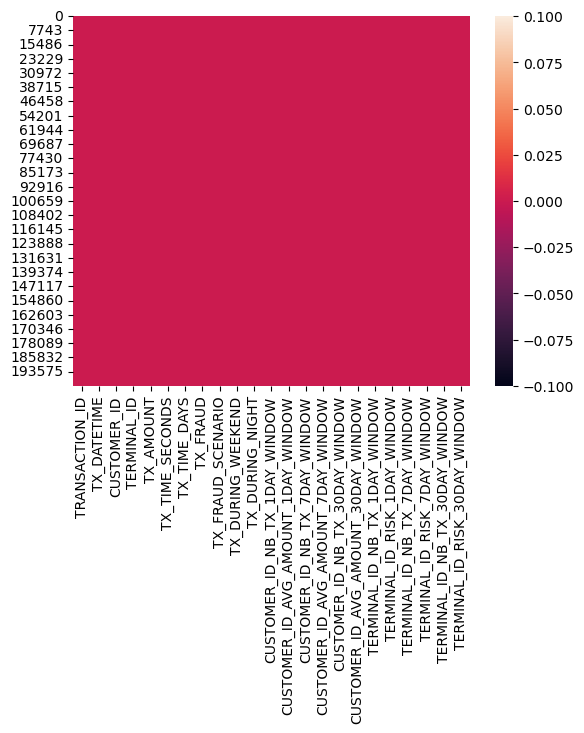

In [32]:
# Visualizar valores nulos con un heatmap
sns.heatmap(df.isnull())

In [33]:
# Ver los valores únicos de la variable TX_FRAUD (variable objetivo)
df.TX_FRAUD.unique()

array([0, 1], dtype=int64)

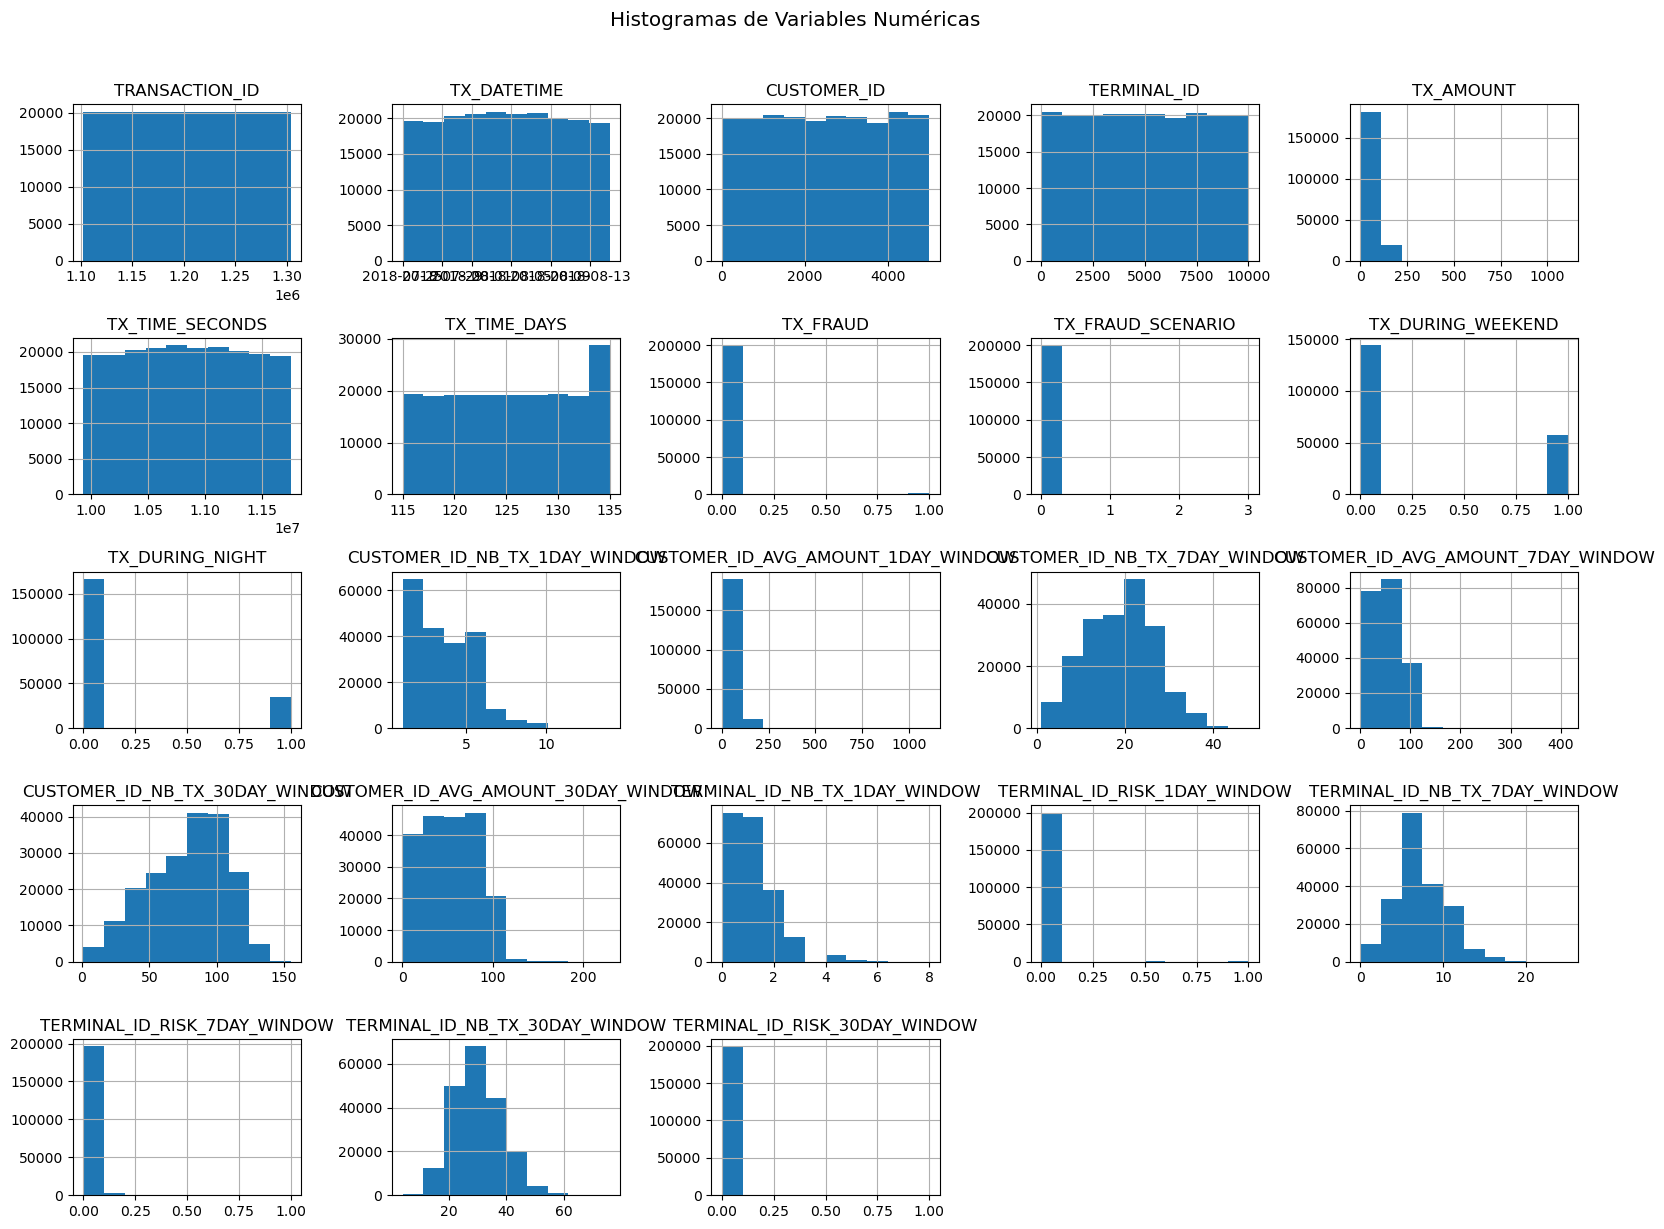

In [34]:
# Histogramas de las variables numéricas
df.hist(bins=10, figsize=(16, 12))
plt.suptitle('Histogramas de Variables Numéricas', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.tight_layout()
plt.show()

Se exploraron histogramas y estadísticas descriptivas para comprender la distribución de las variables numéricas.

In [35]:
# Análisis descriptivo de las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,201295.0,1.203130e+06,58109.005556,1102483.00,1.152806e+06,1.203130e+06,1.253454e+06,1303777.00
CUSTOMER_ID,201295.0,2.506486e+03,1447.777841,0.00,1.250000e+03,2.512000e+03,3.771000e+03,4999.00
TERMINAL_ID,201295.0,4.984673e+03,2887.265852,0.00,2.489000e+03,4.976000e+03,7.484000e+03,9999.00
TX_AMOUNT,201295.0,5.359495e+01,42.060175,0.00,2.097000e+01,4.460000e+01,7.703000e+01,1108.85
TX_TIME_SECONDS,201295.0,1.084261e+07,523352.149056,9936029.00,1.039815e+07,1.084225e+07,1.128650e+07,11750383.00
TX_TIME_DAYS,201295.0,1.249925e+02,6.054087,115.00,1.200000e+02,1.250000e+02,1.300000e+02,135.00
TX_FRAUD,201295.0,8.902357e-03,0.093932,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00
TX_FRAUD_SCENARIO,201295.0,2.005018e-02,0.217758,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.00
TX_DURING_WEEKEND,201295.0,2.846568e-01,0.451252,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00
TX_DURING_NIGHT,201295.0,1.727316e-01,0.378016,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.00


El monto promedio de las transacciones es de aproximadamente 53.59.
La desviación estándar es alta (42.06), indicando una variabilidad significativa en los montos.
La transacción más baja fue de 0.00, mientras que la más alta alcanzó 1,108.85.


In [36]:
# Etiqueta de fraude: una variable binaria, con el valor 0 para una transacción legítima o
# el valor 1 para una transacción fraudulenta.
df_legitima = df[df['TX_FRAUD'] == 0]
df_fraudulenta = df[df['TX_FRAUD'] == 1]


In [37]:
# Obtener porcentajes de operaciones legítimas y fraudulentas
pcj_l = len(df_legitima) / len(df) * 100 
pcj_f = len(df_fraudulenta) / len(df) * 100 

print("Total de operaciones Legitimas,",pcj_l)
print("Total de operaciones Fraudulentas,",pcj_f)

Total de operaciones Legitimas, 99.10976427631088
Total de operaciones Fraudulentas, 0.890235723689113


La tasa de fraudes es baja, con solo el 0.89% de las transacciones marcadas como fraudulentas.
La mayoría de las transacciones (91.1%) son legítimas

In [38]:
# Mostrar un detalle de las variables de las operaciones legítimas y fraudulentas
df_legitima.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,199503.0,1.203142e+06,58110.439918,1102483.00,1.152806e+06,1.203166e+06,1.253476e+06,1.303777e+06
CUSTOMER_ID,199503.0,2.506877e+03,1448.051345,0.00,1.249000e+03,2.513000e+03,3.772000e+03,4.999000e+03
TERMINAL_ID,199503.0,4.986058e+03,2887.163277,0.00,2.490000e+03,4.978000e+03,7.483000e+03,9.999000e+03
TX_AMOUNT,199503.0,5.299821e+01,39.508036,0.00,2.091000e+01,4.445000e+01,7.674000e+01,2.199200e+02
TX_TIME_SECONDS,199503.0,1.084272e+07,523363.662334,9936029.00,1.039815e+07,1.084243e+07,1.128663e+07,1.175038e+07
TX_TIME_DAYS,199503.0,1.249937e+02,6.054217,115.00,1.200000e+02,1.250000e+02,1.300000e+02,1.350000e+02
TX_FRAUD,199503.0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TX_FRAUD_SCENARIO,199503.0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TX_DURING_WEEKEND,199503.0,2.847225e-01,0.451283,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
TX_DURING_NIGHT,199503.0,1.727593e-01,0.378040,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [39]:
df_fraudulenta.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,1792.0,1.201811e+06,57950.113096,1.102569e+06,1.153002e+06,1.199695e+06,1.250883e+06,1.303722e+06
CUSTOMER_ID,1792.0,2.462973e+03,1416.719834,1.000000e+00,1.350000e+03,2.355000e+03,3.622750e+03,4.989000e+03
TERMINAL_ID,1792.0,4.830493e+03,2895.330569,1.500000e+01,2.134500e+03,4.923000e+03,7.592000e+03,9.983000e+03
TX_AMOUNT,1792.0,1.200294e+02,143.189037,1.500000e-01,3.199500e+01,6.626000e+01,1.425850e+02,1.108850e+03
TX_TIME_SECONDS,1792.0,1.083093e+07,522082.576671,9.939847e+06,1.039940e+07,1.082217e+07,1.127289e+07,1.174815e+07
TX_TIME_DAYS,1792.0,1.248616e+02,6.039867,1.150000e+02,1.200000e+02,1.250000e+02,1.300000e+02,1.350000e+02
TX_FRAUD,1792.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
TX_FRAUD_SCENARIO,1792.0,2.252232e+00,0.547055,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
TX_DURING_WEEKEND,1792.0,2.773438e-01,0.447813,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
TX_DURING_NIGHT,1792.0,1.696429e-01,0.375424,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


El monto promedio de las transacciones fraudulentas es considerablemente mayor, alrededor de 120.03.
La desviación estándar es alta (143.19), indicando una variabilidad significativa en los montos.
La transacción fraudulenta de menor monto fue de 0.15, mientras que la de mayor monto alcanzó 1,108.85.

La variable TX_FRAUD_SCENARIO presenta mayor variabilidad en transacciones fraudulentas.
La mayoría de las transacciones fraudulentas (75%) tienen un escenario de fraude clasificado como 2.

Alrededor del 27.7% de las transacciones fraudulentas ocurrieron durante el fin de semana.
La mayoría de las transacciones fraudulentas (72.3%) ocurrieron en días laborables.

El promedio de montos por cliente en la ventana de 1 día para transacciones fraudulentas es de aproximadamente 94.85.
La variabilidad en los montos es significativa, como se refleja en la desviación estándar (103.22).

Alrededor del 40.7% de los terminales involucrados en transacciones fraudulentas presentan algún nivel de riesgo en la ventana de 7 días.
Solo el 30.5% de los terminales no presentan riesgo en esta ventana.

C:\Users\pim\AppData\Local\Temp\ipykernel_2368\822912199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


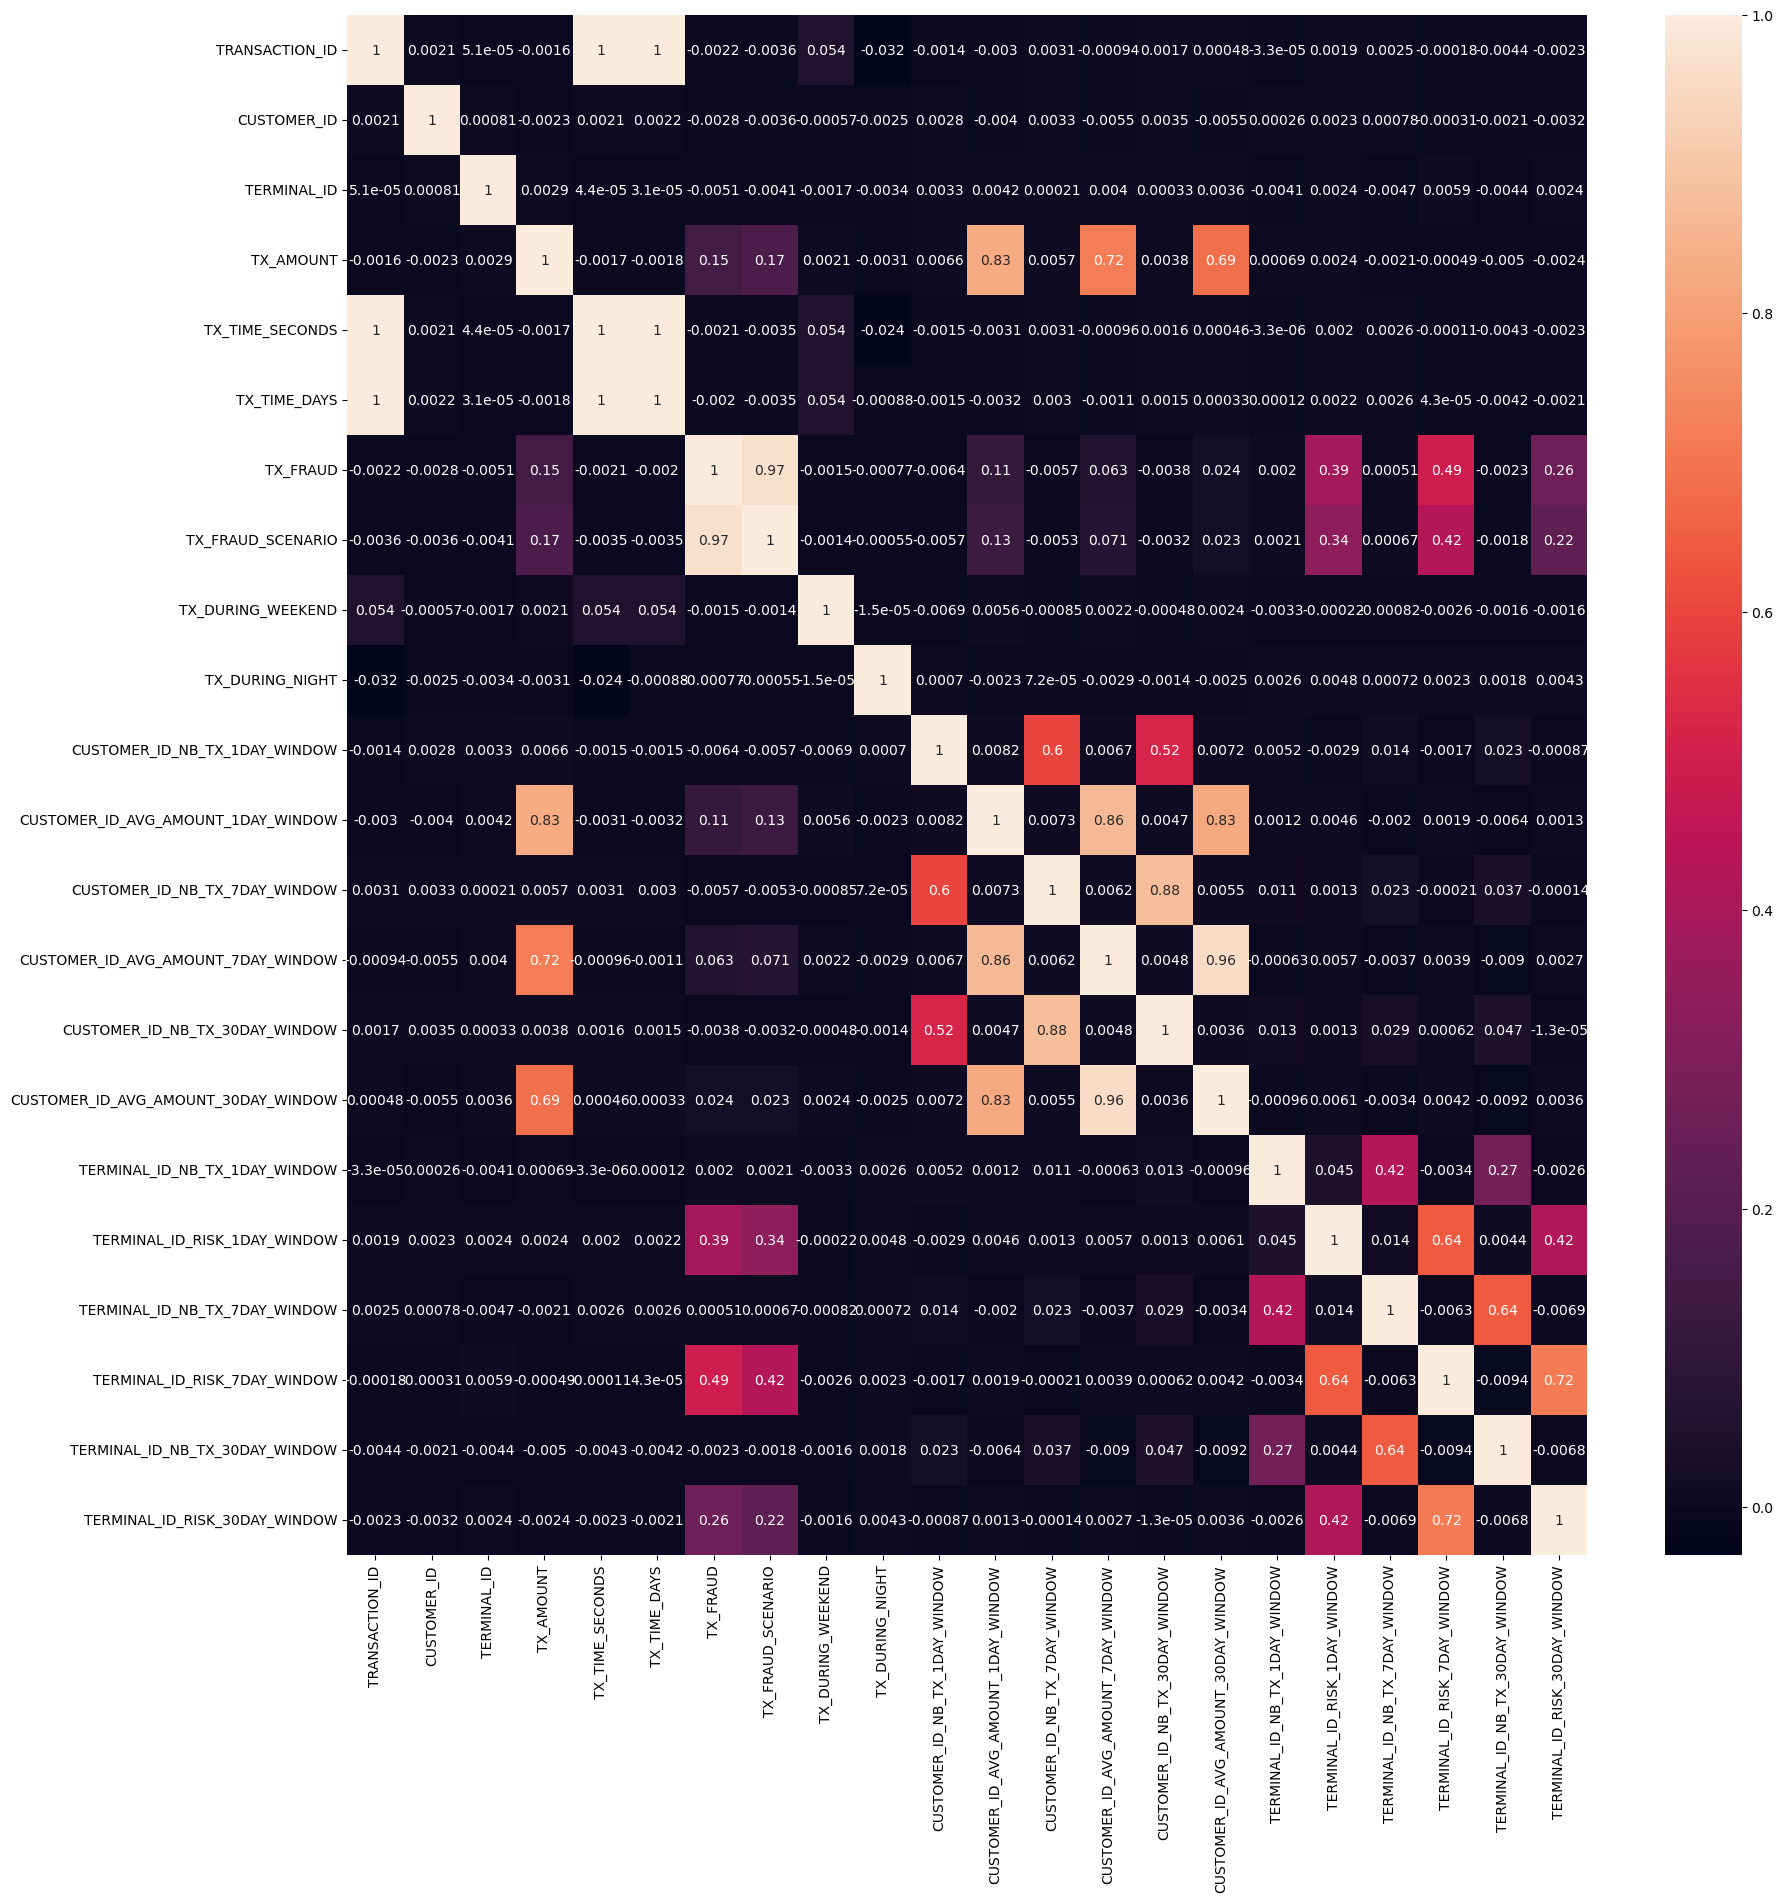

In [40]:
# Correlación entre variables
correlacion = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlacion, annot=True)
plt.show()

La matriz de correlación muestra las relaciones entre las diferentes características en tu conjunto de datos. En este caso, se observa que algunas variables, como 'TX_TIME_SECONDS' y 'TX_TIME_DAYS', están altamente correlacionadas debido a la relación temporal. Además, las características relacionadas con el fraude, como 'TX_FRAUD' y 'TX_FRAUD_SCENARIO', tienen fuertes correlaciones positivas entre sí. Asimismo, algunas variables relacionadas con la actividad del cliente y el terminal muestran ciertas correlaciones. La interpretación detallada de estas correlaciones puede proporcionar insights sobre cómo las diferentes características afectan el riesgo de fraude en tus transacciones.

Se realiza un Análisis de componentes principales (PCA) de datos numericos, escalándolos primero con StandardScaler y luego aplicando PCA para reducir la dimensionalidad a fin de retener al menos el 95% de la varianza original. Esto es útil para reducir la complejidad y redundancia en el conjunto de datos mientras se conserva la mayor cantidad posible de información.

In [55]:
# Selecciona solo las características numéricas para PCA
data_numeric = df.select_dtypes(include=['float64', 'int64'])

# Escalar las características
scaler = StandardScaler()
scaled_data_numeric = scaler.fit_transform(data_numeric)

# Aplicar PCA
pca = PCA(n_components=0.95)
pca.fit(scaled_data_numeric)
data_pca_numeric = pca.transform(scaled_data_numeric)

In [44]:
# Extraer características de fecha y hora
df['TX_YEAR'] = df['TX_DATETIME'].dt.year
df['TX_MONTH'] = df['TX_DATETIME'].dt.month
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_MINUTE'] = df['TX_DATETIME'].dt.minute

# Día de la semana y fin de semana
df['TX_WEEKDAY'] = df['TX_DATETIME'].dt.weekday
df['TX_WEEKEND'] = (df['TX_WEEKDAY'] >= 5).astype(int)


In [45]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_YEAR,TX_MONTH,TX_DAY,TX_HOUR,TX_MINUTE,TX_WEEKDAY,TX_WEEKEND
0,1102483,2018-07-25 00:00:29,1111,2328,40.77,9936029,115,0,0,0,...,0.0,32.0,0.0,2018,7,25,0,0,2,0
1,1102484,2018-07-25 00:01:08,676,6846,9.62,9936068,115,0,0,0,...,0.0,27.0,0.0,2018,7,25,0,1,2,0
2,1102485,2018-07-25 00:01:35,402,4771,81.55,9936095,115,0,0,0,...,0.0,37.0,0.0,2018,7,25,0,1,2,0
3,1102486,2018-07-25 00:01:43,4218,863,23.10,9936103,115,0,0,0,...,0.0,22.0,0.0,2018,7,25,0,1,2,0
4,1102487,2018-07-25 00:02:26,3711,3599,59.25,9936146,115,0,0,0,...,0.0,38.0,0.0,2018,7,25,0,2,2,0


In [48]:
df = df.drop('TX_DATETIME', axis=1)

## Entrenamiento del modelo


In [49]:
# Separación de variable dependiente
y = df['TX_FRAUD']
X = df.drop(['TX_FRAUD'], axis=1)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39906
           1       1.00      1.00      1.00       353

    accuracy                           1.00     40259
   macro avg       1.00      1.00      1.00     40259
weighted avg       1.00      1.00      1.00     40259


Confusion Matrix:
 [[39906     0]
 [    0   353]]


Un Accuracy Score de 1.0 indica que el modelo ha logrado una predicción perfecta en el conjunto de prueba. Sin embargo, un rendimiento perfecto puede ser indicativo de un sobreajuste del modelo a los datos de entrenamiento.

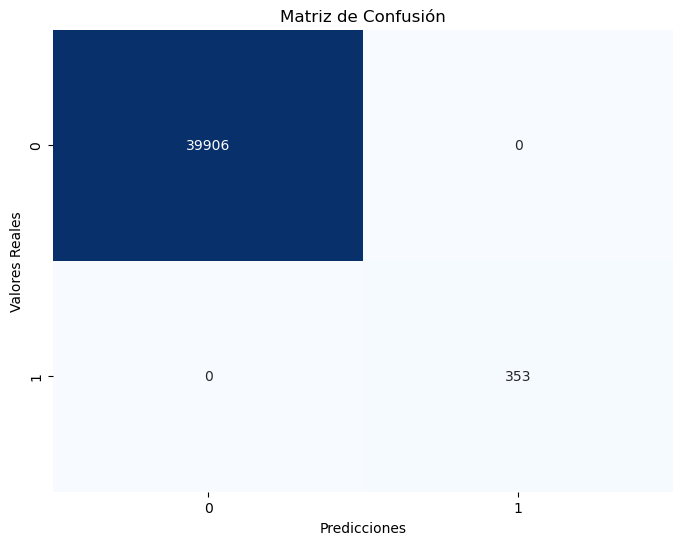

In [64]:
# Matriz de confusión
matriz_conf = confusion_matrix(y_test, y_pred)

# gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

### Validación del modelo

Realizamos una validación cruzada del modelo para obtener una evaluación más robusta de su rendimiento

In [50]:
# Validación cruzada del modelo
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.79259296 0.99997516 1.         1.         1.        ]
Mean CV Accuracy: 0.9585136242827691


El modelo evaluado mediante validación cruzada muestra un rendimiento promedio destacado, con una precisión media de aproximadamente 95.9%. 

In [65]:
# Resumen del modelo
print("Resumen del Modelo:")
print(modelo)

# Características más importantes
if hasattr(modelo, 'feature_importances_'):
    importancias = modelo.feature_importances_
    caracteristicas = X.columns
    resumen_caracteristicas = pd.DataFrame({'Característica': caracteristicas, 'Importancia': importancias})
    resumen_caracteristicas = resumen_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\nCaracterísticas más importantes:")
    print(resumen_caracteristicas)


Resumen del Modelo:
RandomForestClassifier(random_state=42)

Características más importantes:
                         Característica  Importancia
6                     TX_FRAUD_SCENARIO     0.705579
18         TERMINAL_ID_RISK_7DAY_WINDOW     0.075520
3                             TX_AMOUNT     0.066567
20        TERMINAL_ID_RISK_30DAY_WINDOW     0.056051
16         TERMINAL_ID_RISK_1DAY_WINDOW     0.046689
10   CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0.016331
12   CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0.006774
2                           TERMINAL_ID     0.003644
14  CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW     0.003558
0                        TRANSACTION_ID     0.002009
19       TERMINAL_ID_NB_TX_30DAY_WINDOW     0.001973
4                       TX_TIME_SECONDS     0.001796
1                           CUSTOMER_ID     0.001612
17        TERMINAL_ID_NB_TX_7DAY_WINDOW     0.001603
25                            TX_MINUTE     0.001307
15        TERMINAL_ID_NB_TX_1DAY_WINDOW     0.001290
11   

### Conclusiones

##### **Exploración de datos:**
Se cargó y exploró un conjunto de datos que contiene información sobre transacciones financieras.
Se identificaron y manejaron datos duplicados y nulos.
Se observó que el conjunto de datos consta principalmente de variables numéricas, con una columna de fechas.

##### **Análisis descriptivo:**
Se realizó un análisis descriptivo de las variables numéricas, destacando la variabilidad en los montos de las transacciones.
La tasa de fraudes es baja, con solo el 0.89% de las transacciones marcadas como fraudulentas.
Se exploraron detalles sobre transacciones legítimas y fraudulentas, observando diferencias significativas en los montos y escenarios de fraude.

##### **Correlación entre variables:**
Se evaluó la correlación entre las variables, observando relaciones temporales, correlaciones positivas entre características relacionadas con el fraude, y algunas correlaciones entre variables de actividad del cliente y del terminal.

##### **Análisis de componentes principales (PCA):**
Se aplicó PCA para reducir la dimensionalidad del conjunto de datos numéricos, conservando al menos el 95% de la varianza original.

##### **Variables de fecha y hora:**
Se extrajeron características de fecha y hora, como año, mes, día, hora y minuto, a partir de la columna 'TX_DATETIME'.

El modelo RandomForestClassifier con un conjunto de datos ha demostrado un rendimiento sólido en la predicción de fraudes en transacciones con tarjetas de crédito. Las características más importantes para la predicción incluyen 'TX_FRAUD_SCENARIO', 'TERMINAL_ID_RISK_7DAY_WINDOW' y 'TX_AMOUNT', que contribuyen significativamente a la capacidad predictiva del modelo.

Estas conclusiones proporcionan una visión general de la exploración de datos, el análisis descriptivo y algunas técnicas de preprocesamiento aplicadas al conjunto de datos de transacciones financieras. 
